In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
gutter1 = '/content/drive/MyDrive/Assignment_3_images/gutters1.JPG'
gutter2 = '/content/drive/MyDrive/Assignment_3_images/gutters2.JPG'
gutter3 = '/content/drive/MyDrive/Assignment_3_images/gutters3.JPG'

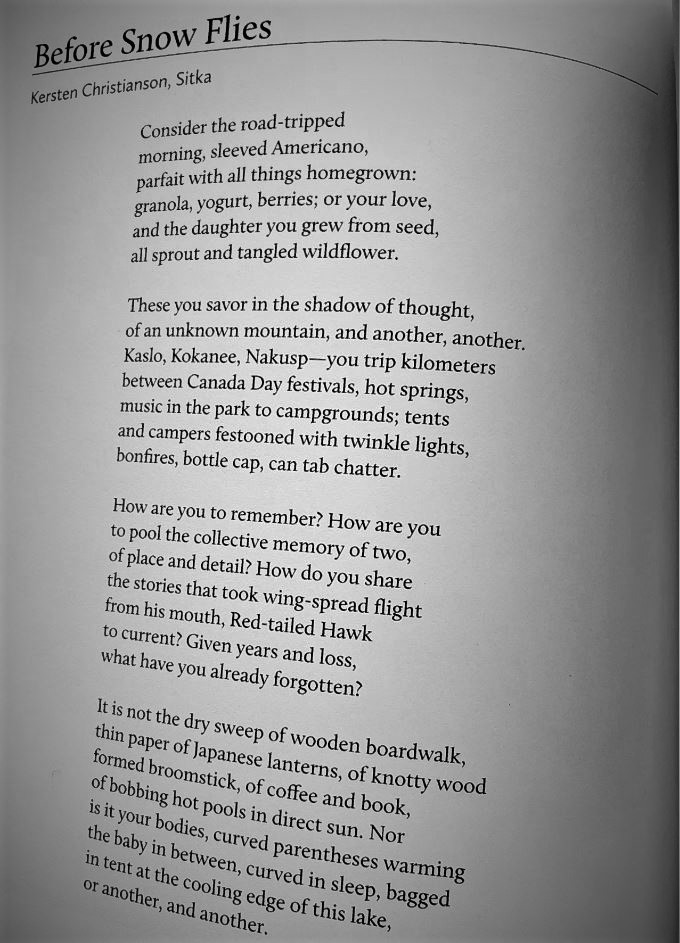

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
g1 = cv2.imread(gutter1, cv2.IMREAD_GRAYSCALE)
g2 = cv2.imread(gutter2, cv2.IMREAD_GRAYSCALE)
g3 = cv2.imread(gutter3, cv2.IMREAD_GRAYSCALE)
cv2_imshow(g3)

In [ ]:
#To remove the shadow by dilating it
def removegutter(image):
  rgb_planes = cv2.split(image)
  result_planes = []
  for plane in rgb_planes:
      dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
      bg_img = cv2.medianBlur(dilated_img, 21)
      diff_img = 255 - cv2.absdiff(plane, bg_img)
      result_planes.append(diff_img)

  result = cv2.merge(result_planes)

  return result

In [ ]:
i = input("Enter the image to be processed")

Enter the image to be processed3


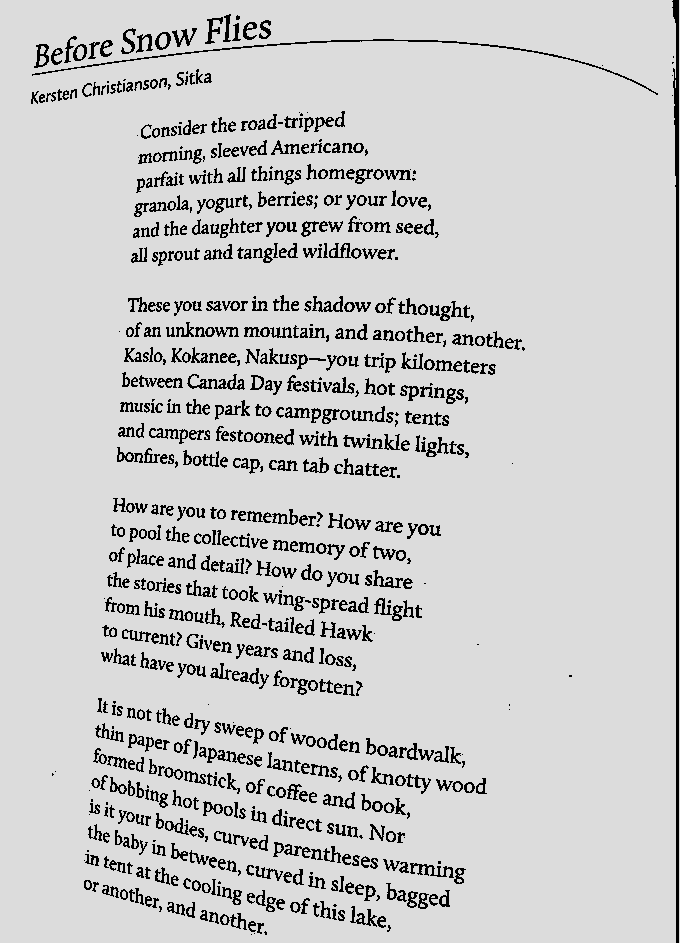

In [ ]:
name = "g{}".format(i)
if name in locals():
  var = locals()[name]
  res = removegutter(var)
  ada = cv2.adaptiveThreshold(res, 220, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 13)
  # Used adaptive threshold instead of normal which changes the threshold based on nearby pixels
else:
  print("Image not found")